In [6]:
# Visualising the data
# • Plot a probability density histogram for each type of stimulus. This height of each bar
# should be the proportion of responses divided by the width of the column.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# Load the data
data_path= "Data/Part_2/"
dfs = []
for file in glob.glob('Data/Part_2/*.txt'):
  dfs.append(pd.DataFrame(np.loadtxt(file)))
df_all = pd.concat(dfs)

In [7]:
# The first row of the array contains response counts for the auditory stimuli. The columns of
# the first row indicate the specific auditory stimulus ranging from very similar to a ’b’ in the
# first column to very similar to a ’d’ in the last column. Likewise, the second row contains
# response counts to the visual stimulus ranging from very similar to a ’b’ to very similar to a
# ’d’. Rows 3-7 contains response counts for the audiovisual stimuli. Rows indicate the visual
# component of the stimulus ranging from very similar to a ’b’ (row 3) to very similar to a ’d’
# (row 7). Columns indicate the auditory component of the stimulus ranging from very similar
# to a ’b’ (column 1) to very similar to a ’d’ (column 5).
# df_all

In [8]:
# split df_all into 5 dfs
df_1 = df_all.iloc[0:7,0:5]
df_2 = df_all.iloc[7:14,0:5]
df_3 = df_all.iloc[14:21,0:5]
df_4 = df_all.iloc[21:28,0:5]
df_5 = df_all.iloc[28:35,0:5]



In [9]:
# fit the early strong fusion model

def early_strong_fusion(data):
    # our code here
    return model

  


In [10]:
df_1

,0,1,2,3,4
0,0.0,1.0,8.0,24.0,24.0
1,0.0,15.0,24.0,23.0,24.0
2,0.0,0.0,1.0,12.0,23.0
3,1.0,1.0,5.0,23.0,24.0
4,0.0,2.0,12.0,23.0,24.0
5,2.0,4.0,17.0,23.0,24.0
6,1.0,7.0,20.0,24.0,24.0


In [66]:
from scipy.stats import norm

means_ini = np.array([1,2,3,4,5])
# means_ini = [1,2,3,4,5]
sigma_a_ini = df_1[0].std(axis=0).mean()
sigma_v_ini = df_1[1].std(axis=0).mean()

In [12]:
# calculate the combined distributions
def combined_distributions(means_est, sigma_a_ini, sigma_v_ini, data):
    w_a = (sigma_v_ini)**2 / ((sigma_v_ini)**2 + (sigma_a_ini)**2)
    
    # 5 by 5 matrix of 0 
    means_av_matrix= np.zeros((5,5))
    print(means_av_matrix)
    # for i in range(5):
    #     for j in range(5):
    #         mean_av = w_a * (means_est[i]) + (1 - w_a) * (means_est[j+2])
    #         np.append(means_av_matrix[i,j], mean_av, axis=0)
    # sigma_av = ((sigma_a_ini)**2 * (sigma_v_ini)**2) / ((sigma_a_ini)**2 + (sigma_v_ini)**2)


    # return [means_av_matrix, sigma_av] 
    return means_av_matrix

In [13]:
combined_distributions(means_ini, sigma_a_ini, sigma_v_ini, df_1)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [14]:
# use the binomial pdf with the normal cdf inside 
# look at the psycometric function for the first assignment homework 
err - stats.binomial.pdf(data0[i], loc=means[i], scale=scale[i]).sum() 


NameError: name 'err' is not defined

In [175]:
def combined_distributions(means_atilde, means_vtilde, sigma_a_ini, sigma_v_ini):
    w_a = (sigma_v_ini)**2 / ((sigma_v_ini)**2 + (sigma_a_ini)**2)
    w_v = (sigma_a_ini)**2 / ((sigma_a_ini)**2 + (sigma_v_ini)**2)
    
    # 5 by 5 matrix of 0 
    means_av_matrix= np.zeros((5,5))
    for i in range(5):
        for j in range(5):
            #mean_av = w_a * means_atilde[i] + (1 - w_a) * means_vtilde[j]
            mean_av = w_a * means_atilde[i] + w_v * means_vtilde[j]
            means_av_matrix[i,j] = mean_av
    sigma_av = ((sigma_a_ini)**2 * (sigma_v_ini)**2) / ((sigma_a_ini)**2 + (sigma_v_ini)**2)


    return [means_av_matrix, sigma_av] 
    #return means_av_matrix
    

In [176]:
#combined_distributions(means_ini, sigma_a_ini, sigma_v_ini, 0.4, 0.8)

In [183]:
# fit an early Bayesian Causal Inference model (BCI)

from scipy import stats
import scipy

NUM_RESPONSES = 24

def early_BCI(params, d):
    means = np.array(params[:5])
    sigma_a = params[5]
    sigma_v = params[6] 
    c_a = params[7]
    c_v = params[8]
    c = params[9]

    #c_a = 1/(1+np.exp(-c_a))
    #c_v = 1/(1+np.exp(-c_v))

    c = 1/(1+np.exp(-c))

    means_atilde = means - c_a
    means_vtilde = means - c_v

    estimates = combined_distributions(means_atilde, means_vtilde, sigma_a, sigma_v)
    audiovisual_means = estimates[0]
    sigma_av = estimates[1]
    # Calculate  log likelihood
    
    mu_av_a = np.transpose(np.vstack([means_atilde, means_atilde, means_atilde, means_atilde, means_atilde]))

    Pa = stats.norm.cdf((means_atilde - c_a)/sigma_a)
    Pv = stats.norm.cdf((means_vtilde - c_v)/sigma_v)
    Pav = stats.norm.cdf((audiovisual_means)/sigma_av)
    Pav_a = stats.norm.cdf((mu_av_a)/sigma_a)

    L = []
    for i in range(5):
        for j in range(5):
            L.append(np.log(stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav[i][j])*c + stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav_a[i][j])*(1-c)))

    nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
    return nll

###### is this just the same as we did in part 1? The BCI model? ######

In [184]:
parameters = [1,2,3,4,5, sigma_a_ini, sigma_v_ini, 0.5, 0.5, 0]
e_bci_0 = minimize(early_BCI, parameters, data[0])
e_bci_0

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:39: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav[i][j])*c + stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav_a[i][j])*(1-c)))
/opt/homebrew/lib/python3.10/site-packages/scipy/st

      fun: 52.13056733161228
 hess_inv: array([[ 1.10442887e+01,  2.92778435e+00, -1.89637206e-01,
        -8.94686397e+00, -1.10911744e+01, -1.38935769e+00,
        -1.40983030e+00, -5.51822689e-01,  2.35410282e+00,
        -2.17134130e-01],
       [ 2.92778435e+00,  2.30668283e+00,  9.86330593e-01,
        -1.36944798e+00, -1.92398188e+00, -2.78670974e-01,
        -2.61519745e-01,  4.36550472e-01,  1.33335240e+00,
        -3.98395045e-01],
       [-1.89637206e-01,  9.86330593e-01,  1.86713631e+00,
         1.73889775e+00,  1.74189317e+00,  1.79712282e-01,
         2.21042267e-01,  9.04212033e-01,  5.35571213e-01,
        -1.14073508e-01],
       [-8.94686397e+00, -1.36944798e+00,  1.73889775e+00,
         1.02955634e+01,  1.11440208e+01,  1.41764760e+00,
         1.44844673e+00,  1.44497292e+00, -1.37393700e+00,
        -1.59638688e-01],
       [-1.10911744e+01, -1.92398188e+00,  1.74189317e+00,
         1.11440208e+01,  1.44608650e+01,  1.69008958e+00,
         1.72049534e+00,  1.51

In [185]:
e_bci_1 = minimize(early_BCI, parameters, data[1])
e_bci_1

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)


      fun: 61.18995844186229
 hess_inv: array([[ 0.18909616,  0.18573249,  0.26420391,  0.41385408,  0.57708318,
         0.06495379, -0.03181546,  0.16578615,  0.11075992, -0.03708021],
       [ 0.18573249,  0.38443865,  0.52827179,  0.90436818,  1.1135195 ,
         0.15631357,  0.02772742,  0.31810658,  0.18751692, -0.03376641],
       [ 0.26420391,  0.52827179,  0.8469716 ,  1.37597767,  1.67844638,
         0.24554038,  0.04495536,  0.47588106,  0.26793784, -0.04350306],
       [ 0.41385408,  0.90436818,  1.37597767,  2.72706461,  2.9315902 ,
         0.46523583,  0.09937933,  0.83495429,  0.44272027, -0.08932652],
       [ 0.57708318,  1.1135195 ,  1.67844638,  2.9315902 ,  3.65267647,
         0.5389691 ,  0.08849468,  1.01930626,  0.5516077 , -0.0433529 ],
       [ 0.06495379,  0.15631357,  0.24554038,  0.46523583,  0.5389691 ,
         0.09189425,  0.02470562,  0.14658051,  0.07504625, -0.01196809],
       [-0.03181546,  0.02772742,  0.04495536,  0.09937933,  0.08849468,
     

In [186]:
e_bci_2 = minimize(early_BCI, parameters, data[2])
e_bci_2

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:39: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav[i][j])*c + stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav_a[i][j])*(1-c)))
/opt/homebrew/lib/python3.10/site-packages/scipy/st

      fun: 65.10303632606644
 hess_inv: array([[ 7.50451254e-01,  3.68487173e-01,  1.41912293e-01,
         4.24121080e-01,  1.22767209e+00, -1.14961112e-02,
         2.00006276e-02,  9.92393471e-02,  5.50698670e-01,
        -2.45636362e+00],
       [ 3.68487173e-01,  2.25775816e-01,  8.22047453e-02,
         2.21704815e-01,  6.36078949e-01, -5.93291140e-03,
         1.04286018e-02,  5.40606075e-02,  2.91184890e-01,
        -1.31495052e+00],
       [ 1.41912293e-01,  8.22047453e-02,  6.94629488e-02,
         8.56372468e-02,  1.90269811e-01, -6.09082815e-03,
         3.92023839e-03,  3.11216951e-02,  1.06853137e-01,
        -5.82632524e-01],
       [ 4.24121080e-01,  2.21704815e-01,  8.56372468e-02,
         3.73996091e-01,  8.21899465e-01, -3.25182631e-03,
         1.34533575e-02,  6.10154359e-02,  3.48428244e-01,
        -1.58683729e+00],
       [ 1.22767209e+00,  6.36078949e-01,  1.90269811e-01,
         8.21899465e-01,  2.43233987e+00, -3.11773266e-03,
         3.90791954e-02,  1.46

In [187]:
e_bci_3 = minimize(early_BCI, parameters, data[3])
e_bci_3

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:39: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav[i][j])*c + stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav_a[i][j])*(1-c)))
/opt/homebrew/lib/python3.10/site-packages/scipy/st

      fun: 67.21195842405174
 hess_inv: array([[ 2.46016065e-01,  1.47017252e-01,  1.07807243e-01,
        -7.37486459e-02, -1.35677141e-01, -8.09643373e-02,
        -5.32395861e-02,  1.41137614e-02,  3.86060123e-02,
        -9.02786149e+01],
       [ 1.47017252e-01,  1.10643423e-01,  7.45230817e-02,
        -4.07158688e-02, -7.97360475e-02, -4.99985826e-02,
        -3.36709772e-02,  1.43881467e-02,  3.02024821e-02,
        -5.90914720e+01],
       [ 1.07807243e-01,  7.45230817e-02,  6.49406202e-02,
        -2.47774838e-02, -5.17409898e-02, -3.56986773e-02,
        -2.39612287e-02,  1.33617950e-02,  2.51427967e-02,
        -4.21653903e+01],
       [-7.37486459e-02, -4.07158688e-02, -2.47774838e-02,
         5.75151475e-02,  7.54722787e-02,  3.20724329e-02,
         2.17122601e-02,  1.35806845e-02,  2.11556555e-03,
         3.65795623e+01],
       [-1.35677141e-01, -7.97360475e-02, -5.17409898e-02,
         7.54722787e-02,  1.36699357e-01,  5.71617184e-02,
         3.76648483e-02,  1.40

In [188]:
e_bci_4 = minimize(early_BCI, parameters, data[4])
e_bci_4

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:41: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(d[0,:], NUM_RESPONSES, Pa))) - sum(np.log(stats.binom.pmf(d[1,:], NUM_RESPONSES, Pv))) - sum(L)
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/1513279994.py:39: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav[i][j])*c + stats.binom.pmf(d[i+2][j], NUM_RESPONSES, Pav_a[i][j])*(1-c)))
/opt/homebrew/lib/python3.10/site-packages/scipy/st

      fun: 51.493910720265276
 hess_inv: array([[ 4.18626964e-01,  1.23116713e-01,  5.51225406e-02,
        -2.28215802e-03, -2.25188894e-01, -6.31834975e-02,
        -3.53308609e-02,  4.61778232e-02,  4.67521419e-02,
         1.05820683e-01],
       [ 1.23116713e-01,  1.23434688e-01,  3.94852591e-02,
        -1.00604099e-03, -1.21331148e-01, -3.74702162e-02,
        -2.29552217e-02,  3.48880757e-02,  3.26145398e-02,
        -2.13028365e-01],
       [ 5.51225406e-02,  3.94852591e-02,  6.29812754e-02,
        -5.74957217e-04, -5.79392074e-02, -1.95928138e-02,
        -9.72767318e-03,  2.59801587e-02,  1.43524351e-02,
        -9.76435340e-02],
       [-2.28215802e-03, -1.00604099e-03, -5.74957217e-04,
         4.64067239e-04,  1.16112896e-03,  3.36726575e-04,
         2.35551841e-04, -3.93210299e-04, -3.92426641e-04,
        -1.12189048e-02],
       [-2.25188894e-01, -1.21331148e-01, -5.79392074e-02,
         1.16112896e-03,  3.82901493e-01,  5.16345518e-02,
         3.29314935e-02, -2.9

In [100]:
data = np.array([pd.read_csv("Data/Part_2/Homework3pt2DataCSV{}.txt".format(i), header = None, sep= "\s+") for i in range(1,6)], dtype=int)
data[0]

array([[ 0,  2,  4, 24, 24],
       [ 0, 17, 24, 24, 24],
       [ 0,  0,  0, 10, 14],
       [ 4,  8,  7, 20, 22],
       [ 9, 15, 19, 24, 24],
       [14, 17, 22, 24, 24],
       [14, 19, 23, 24, 24]])

In [31]:
from scipy.stats import norm
import math
import scipy
from scipy.optimize import minimize
import numpy as np

NUM_RESPONSES = 24

def cdf_a_v(mu, sigma, c):
    return norm.cdf(mu, c, sigma)

def cdf_av(mu_a, mu_v, sigma_a, sigma_v, c_a, c_v):
    mu_av = (sigma_v ** 2 / (sigma_a ** 2 + sigma_v ** 2)) * (mu_a - c_a) + (sigma_a ** 2 / (sigma_a ** 2 + sigma_v ** 2)) * (mu_v - c_v)
    sigma_av = math.sqrt((sigma_a ** 2 * sigma_v ** 2) / (sigma_a ** 2 + sigma_v ** 2))
    return norm.cdf(mu_av/sigma_av)

def gauss_likelihood_a_v(mu, sigma, c, x):
    return scipy.special.binom(NUM_RESPONSES, x) * cdf_a_v(mu, sigma, c)**x * (1 - cdf_a_v(mu, sigma, c))**(NUM_RESPONSES - x)

def gauss_likelihood_av(mu_a, mu_v, sigma_a, sigma_v, c_a, c_v, x):
    return scipy.special.binom(NUM_RESPONSES, x) * cdf_av(mu_a, mu_v, sigma_a, sigma_v, c_a, c_v) ** x * (1 - cdf_av(mu_a, mu_v, sigma_a, sigma_v, c_a, c_v)) ** (NUM_RESPONSES - x)

def log_likelihood_gaussian(params, d):
    c_a, c_v, sigma_a, sigma_v = params
    sigma_a = np.exp(sigma_a)
    sigma_v = np.exp(sigma_v)
    l_av = []
    
    l_a = np.prod([gauss_likelihood_a_v(j + 1, sigma_a, c_a, d[0][j]) for j in range(0, 5)])
    l_v = np.prod([gauss_likelihood_a_v(j + 1, sigma_v, c_v, d[1][j]) for j in range(0, 5)])

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(gauss_likelihood_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v, d[i+2][j]))
            
    return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))

In [43]:
s_mle_0 = minimize(log_likelihood_gaussian, [1,1,1,1], data[0])
s_mle_0

      fun: 72.80160664670224
 hess_inv: array([[ 0.01443079, -0.00955743,  0.0004844 , -0.0003426 ],
       [-0.00955743,  0.01375939, -0.00035124, -0.00129425],
       [ 0.0004844 , -0.00035124,  0.00430823,  0.0035287 ],
       [-0.0003426 , -0.00129425,  0.0035287 ,  0.00409533]])
      jac: array([ 4.76837158e-06,  6.67572021e-06, -9.53674316e-06,  2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 327
      nit: 17
     njev: 63
   status: 2
  success: False
        x: array([ 3.31169199,  1.85769071, -0.10208321, -0.13326469])

In [44]:
s_mle_1 = minimize(log_likelihood_gaussian, [1,1,1,1], data[1])
s_mle_1

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/3376753262.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 55.07570757998338
 hess_inv: array([[ 0.01304103, -0.0061036 ,  0.00062493,  0.000466  ],
       [-0.0061036 ,  0.00610614, -0.00042042, -0.00078928],
       [ 0.00062493, -0.00042042,  0.00537157,  0.00415236],
       [ 0.000466  , -0.00078928,  0.00415236,  0.00429319]])
      jac: array([ 1.43051147e-06,  0.00000000e+00,  9.53674316e-07, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 115
      nit: 16
     njev: 23
   status: 0
  success: True
        x: array([ 3.02055526,  1.98442428, -0.2731591 , -0.5333263 ])

In [45]:
s_mle_2 = minimize(log_likelihood_gaussian, [1,1,1,1], data[2])
s_mle_2

      fun: 69.41370636322846
 hess_inv: array([[ 0.01011926, -0.00940671,  0.00025314, -0.00064675],
       [-0.00940671,  0.02095454, -0.00083205, -0.0019012 ],
       [ 0.00025314, -0.00083205,  0.00372623,  0.00331495],
       [-0.00064675, -0.0019012 ,  0.00331495,  0.00486017]])
      jac: array([9.53674316e-07, 2.86102295e-06, 1.90734863e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 125
      nit: 19
     njev: 25
   status: 0
  success: True
        x: array([ 2.90251538,  2.04763446, -0.09581152,  0.12568088])

In [42]:
s_mle_3 = minimize(log_likelihood_gaussian, [1,1,1,1], data[3])
s_mle_3

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/3376753262.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/3376753262.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))


      fun: 67.21261014007071
 hess_inv: array([[ 5.29848166e-03, -6.91637978e-03,  2.61624648e-04,
         2.77321920e-04],
       [-6.91637978e-03,  2.26662880e-02, -1.46298987e-05,
        -1.01102489e-04],
       [ 2.61624648e-04, -1.46298987e-05,  3.52795416e-03,
         3.54690878e-03],
       [ 2.77321920e-04, -1.01102489e-04,  3.54690878e-03,
         6.32349497e-03]])
      jac: array([ 9.53674316e-07,  0.00000000e+00,  9.53674316e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 139
      nit: 20
     njev: 27
   status: 0
  success: True
        x: array([ 3.35798125,  3.10656045, -0.36319639,  0.12981739])

In [46]:
s_mle_4 = minimize(log_likelihood_gaussian, [1,1,1,1], data[4])
s_mle_4

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/3376753262.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/3376753262.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))


      fun: 53.546461594314835
 hess_inv: array([[ 0.00503987, -0.00595117,  0.00017095, -0.00079422],
       [-0.00595117,  0.02059949, -0.00070083, -0.00190109],
       [ 0.00017095, -0.00070083,  0.00370752,  0.00381946],
       [-0.00079422, -0.00190109,  0.00381946,  0.0060861 ]])
      jac: array([-9.53674316e-07,  9.53674316e-07, -1.90734863e-06,  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 124
      nit: 18
     njev: 24
   status: 0
  success: True
        x: array([ 3.32445193,  2.0717807 , -0.5329072 , -0.07674361])

## Training and test error

In [47]:
def calculate_p_mle(subject):
    ps_1 = []
    for s in subject:
        c_a, c_v, sigma_a, sigma_v = s.x
        sigma_a = np.exp(sigma_a)
        sigma_v = np.exp(sigma_v)
        p_1 = []
        for i in range(5):
            p_1.append(cdf_a_v(i + 1, sigma_a, c_a))

        for i in range(5):
            p_1.append(cdf_a_v(i + 1, sigma_v, c_v))

        for i in range(5):
            for j in range(0, 5):
                p_1.append(cdf_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v))

        ps_1.append(p_1)
    return ps_1

def log_likelihood_gaussian_2(params, d, test):
    c_a, c_v, sigma_a, sigma_v = params
    sigma_a = np.exp(sigma_a)
    sigma_v = np.exp(sigma_v)
    l_av = []
    
    l_a = [gauss_likelihood_a_v(j + 1, sigma_a, c_a, d[0][j]) for j in range(0, 5)]
    l_v = [gauss_likelihood_a_v(j + 1, sigma_v, c_v, d[1][j]) for j in range(0, 5)]

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(gauss_likelihood_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v, d[i+2][j]))
           
    l = l_a + l_v + l_av
    l[test] = 1
    return -np.log(np.prod(l))

def compute_binom_mle(params, d, test):
    c_a, c_v, sigma_a, sigma_v = params
    sigma_a = np.exp(sigma_a)
    sigma_v = np.exp(sigma_v)
    l_av = []
    
    l_a = [gauss_likelihood_a_v(j + 1, sigma_a, c_a, d[0][j]) for j in range(0, 5)]
    l_v = [gauss_likelihood_a_v(j + 1, sigma_v, c_v, d[1][j]) for j in range(0, 5)]

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(gauss_likelihood_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v, d[i+2][j]))
           
    l = l_a + l_v + l_av
    return -np.log(l[test])

In [50]:
p_4_mle = []

for s in range(5):
    test_err = []
    training_err = []
    p_4_mle_s = []
    for i in range(35):
        m = minimize(log_likelihood_gaussian_2, [1,1,1,1], args=(data[s], i))
        training_err.append(m.fun)
        test_err.append(compute_binom_mle(m.x, data[s], i))
        p_4_mle_s.append(calculate_p_mle([m])[0][i])

    p_4_mle.append(p_4_mle_s)
    print("TRAINING ERR DATA", s , np.mean(training_err))
    print("TEST ERR DATA", s, sum(test_err))

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))


TRAINING ERR DATA 0 70.51299850101547
TEST ERR DATA 0 89.29676889243257


/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimiz

TRAINING ERR DATA 1 53.28329738838497
TEST ERR DATA 1 73.01057914577899


/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimiz

TRAINING ERR DATA 2 67.28444636463071
TEST ERR DATA 2 80.73466370180756


/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykern

TRAINING ERR DATA 3 65.13256528541969
TEST ERR DATA 3 79.65111487597332


/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykern

TRAINING ERR DATA 4 51.87738141976118
TEST ERR DATA 4 64.84448379963379


/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_21871/4241222028.py:36: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))


# Scatterplots

In [189]:
def calculate_p_mle(subject):
    ps_1 = []
    for s in subject:
        c_a, c_v, sigma_a, sigma_v = s.x
        sigma_a = np.exp(sigma_a)
        sigma_v = np.exp(sigma_v)
        p_1 = []
        for i in range(5):
            p_1.append(cdf_a_v(i + 1, sigma_a, c_a))

        for i in range(5):
            p_1.append(cdf_a_v(i + 1, sigma_v, c_v))

        for i in range(5):
            for j in range(0, 5):
                p_1.append(cdf_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v))

        ps_1.append(p_1)
    return ps_1

In [190]:
ps_2 = calculate_p_mle([s_mle_0,s_mle_1,s_mle_2,s_mle_3,s_mle_4])

Text(0, 0.5, 'Proportions')

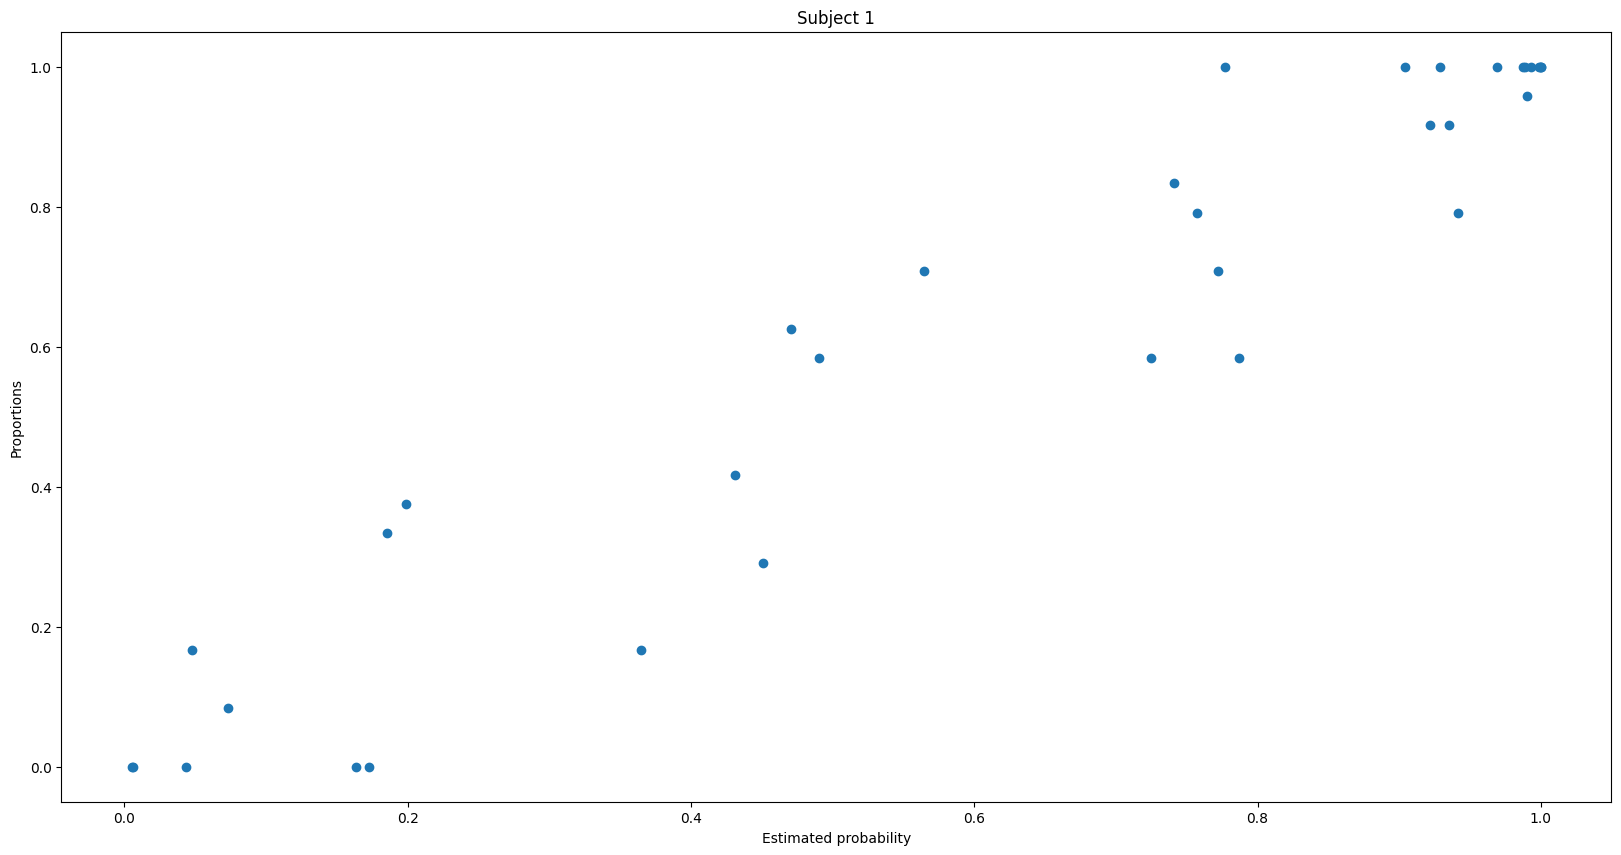

In [191]:
plt.figure()    
plt.scatter(ps_2[0], (data[0]/24).reshape((35,1)))
plt.title('Subject 1')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

Text(0, 0.5, 'Proportions')

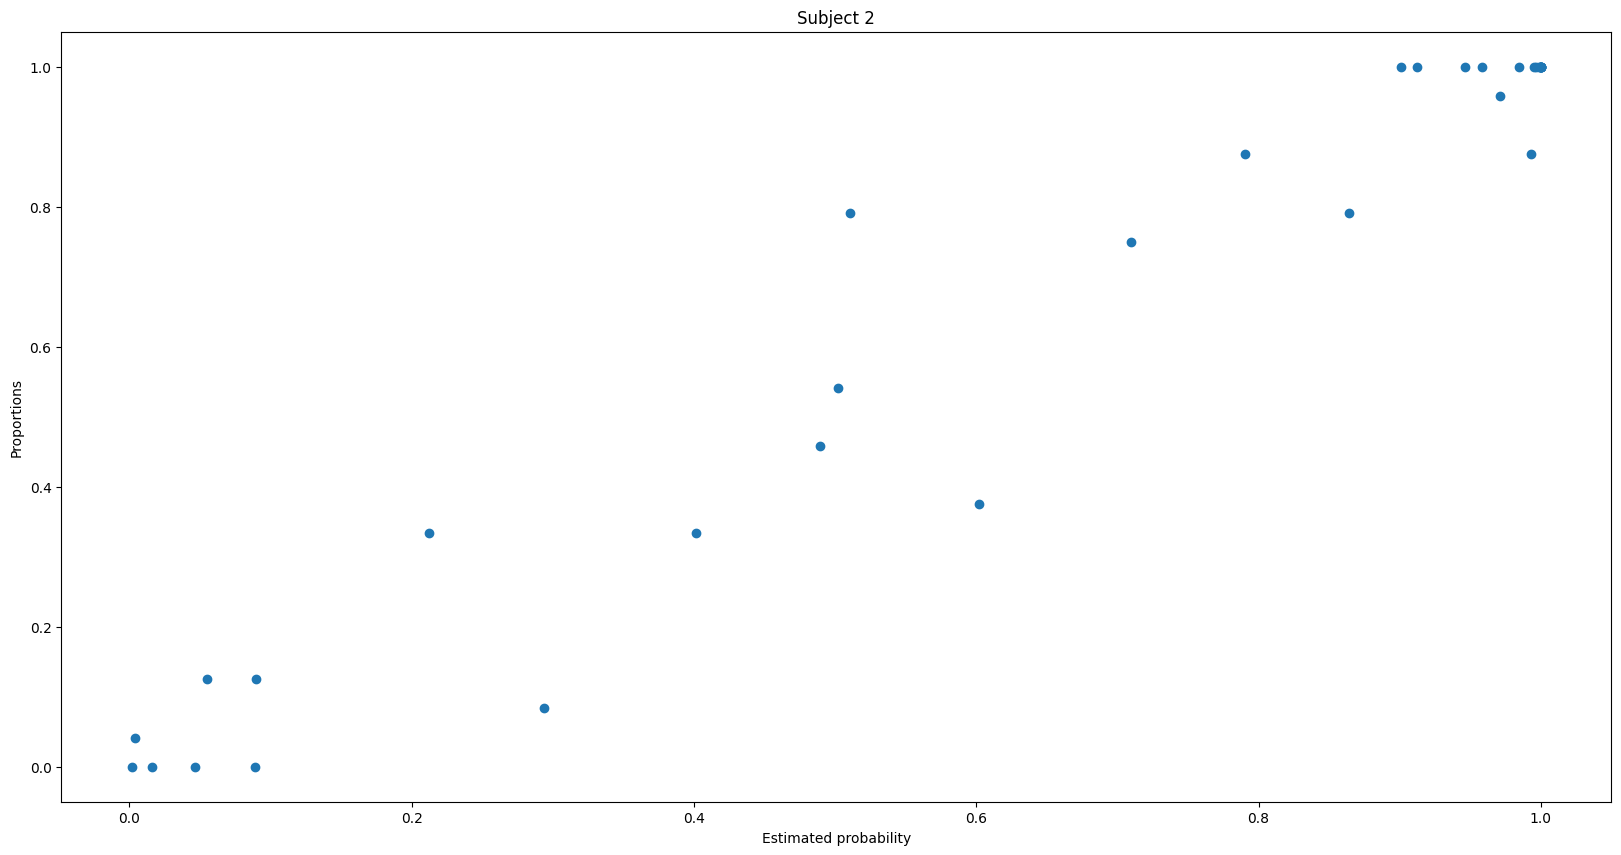

In [192]:
plt.figure()    
plt.scatter(ps_2[1], (data[1]/24).reshape((35,1)))
plt.title('Subject 2')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

Text(0, 0.5, 'Proportions')

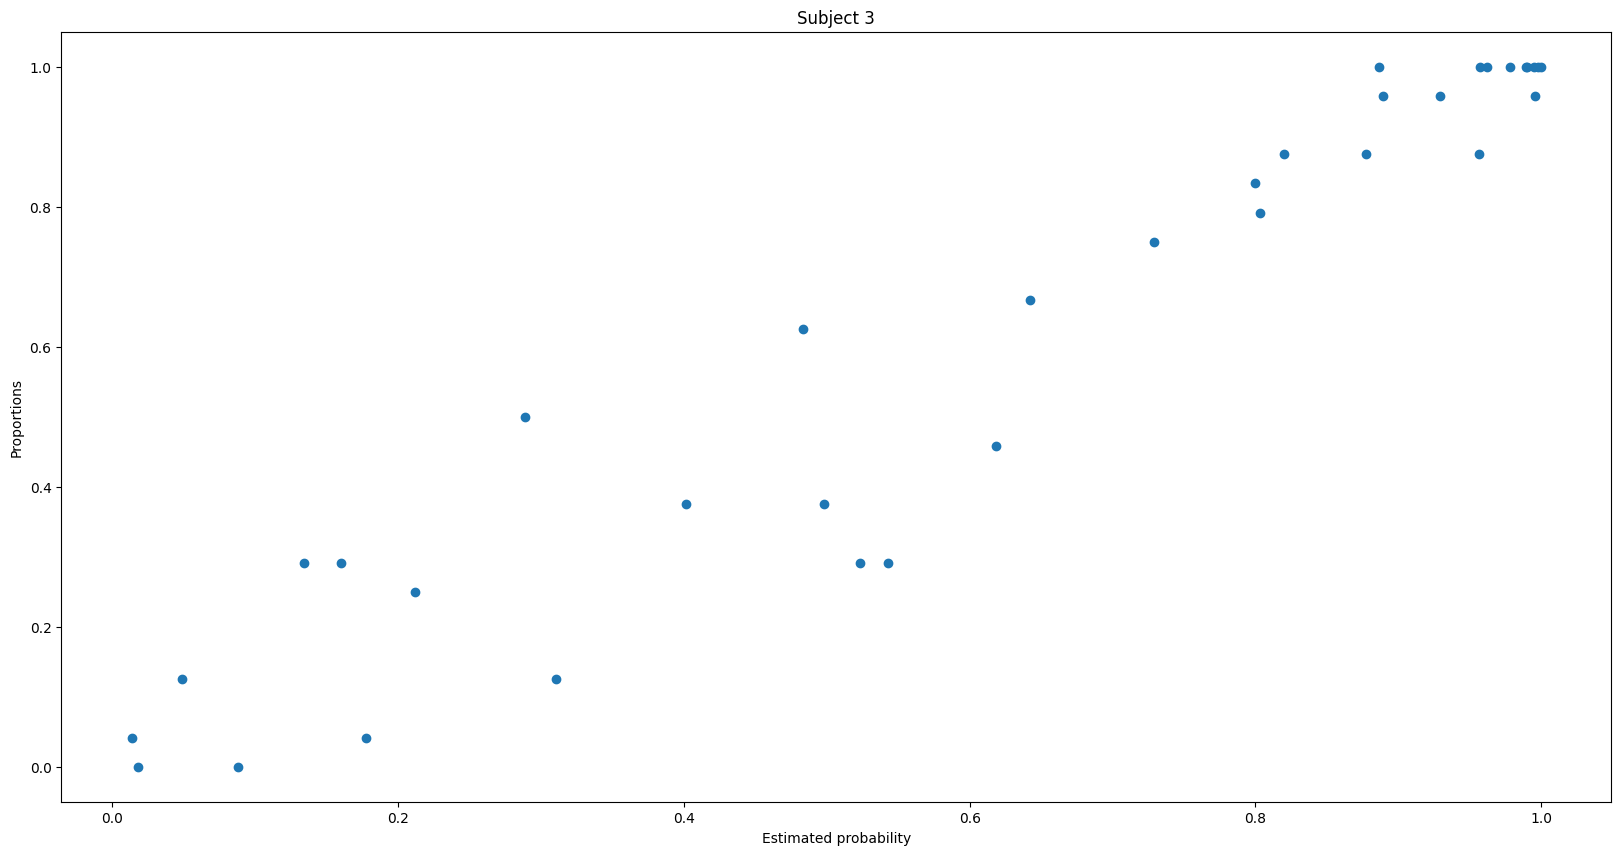

In [193]:
plt.figure()    
plt.scatter(ps_2[2], (data[2]/24).reshape((35,1)))
plt.title('Subject 3')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

Text(0, 0.5, 'Proportions')

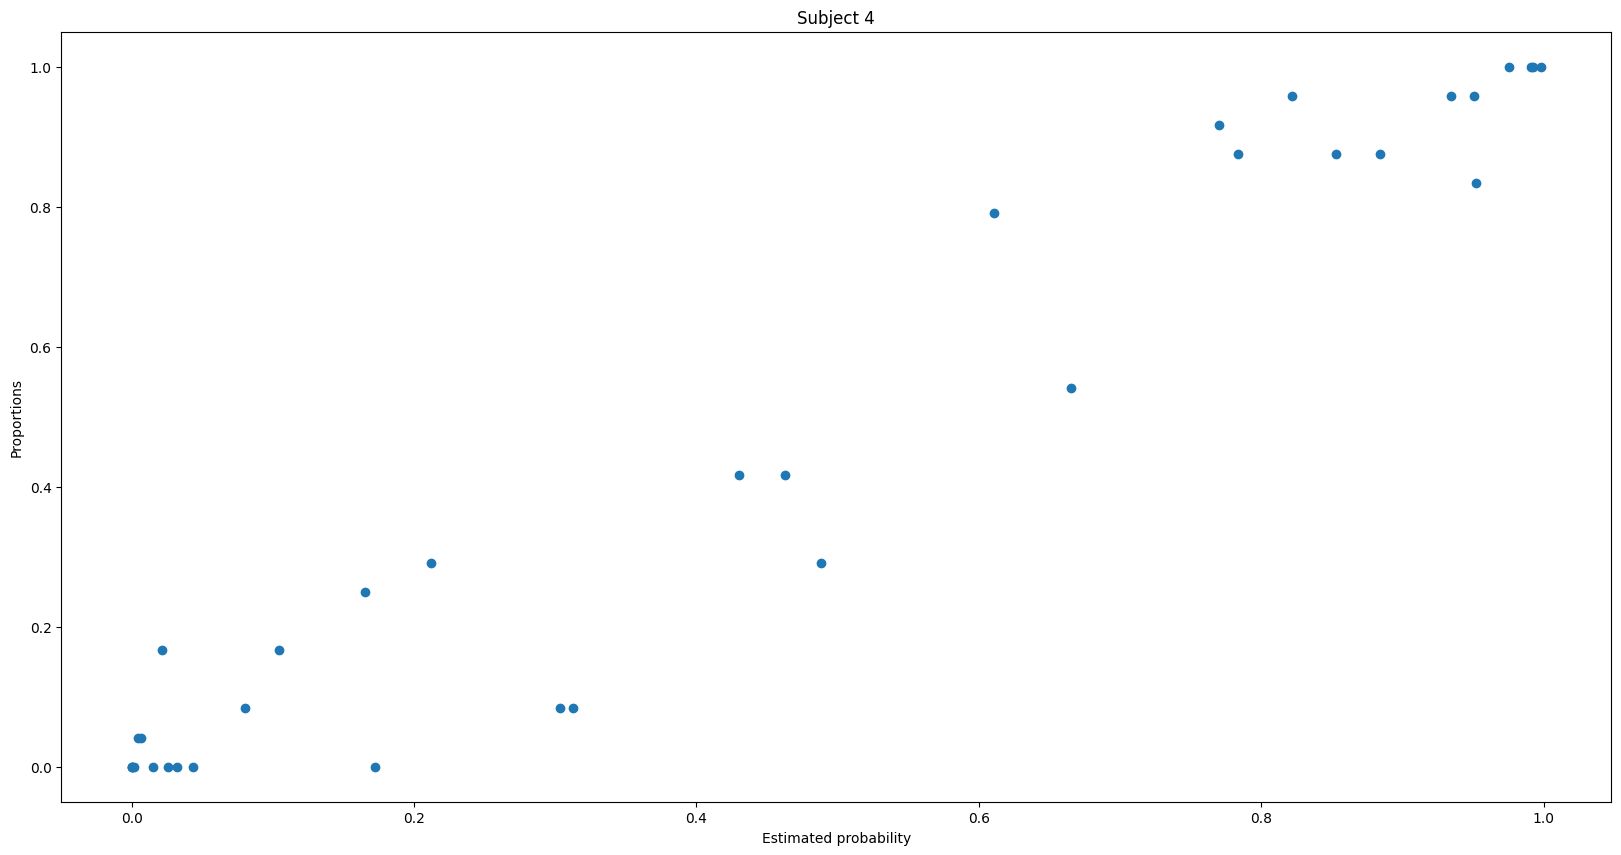

In [194]:
plt.figure()    
plt.scatter(ps_2[3], (data[3]/24).reshape((35,1)))
plt.title('Subject 4')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

Text(0, 0.5, 'Proportions')

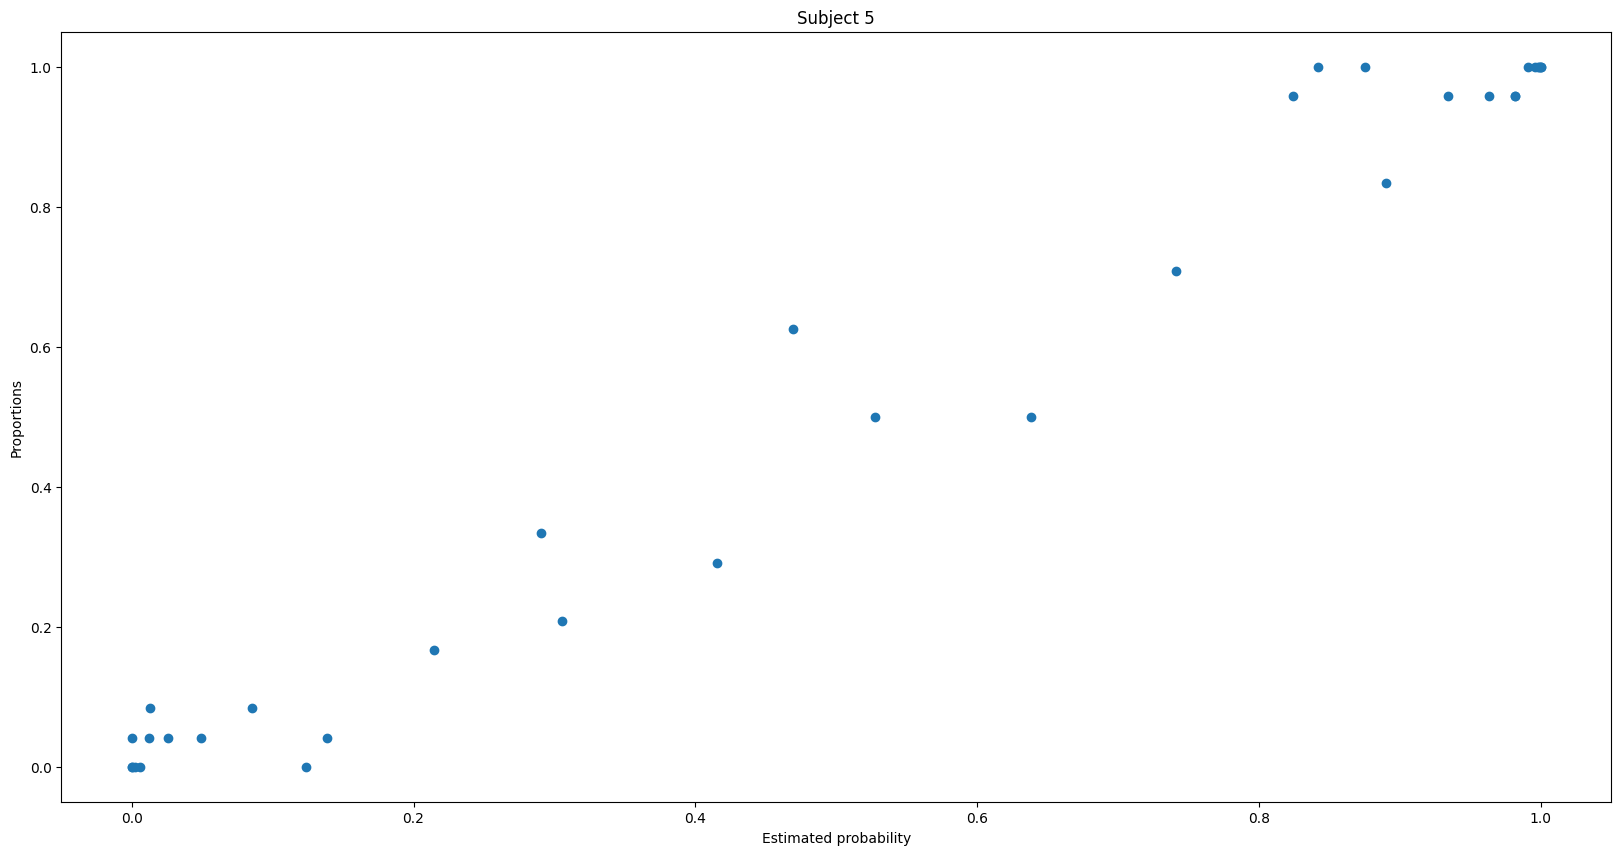

In [195]:
plt.figure()    
plt.scatter(ps_2[4], (data[4]/24).reshape((35,1)))
plt.title('Subject 5')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')